<a href="https://colab.research.google.com/github/MassielC/ML_teaching/blob/main/ML_for_biomedical_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Librerías necesarias
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Cargar el dataset
file_path = '/content/drive/MyDrive/ML_biomed_course/Exasens.csv'
exasens_data = pd.read_csv(file_path)

# Exploración de datos inicial
print("Datos iniciales:\n", exasens_data.head())
print("\nDescripción de datos:\n", exasens_data.describe())
print("\nInformación de columnas:\n", exasens_data.info())


Datos iniciales:
   Diagnosis     ID  Imagery_part_min  Imagery_part_avg  Real_part_min  \
0      COPD  301-4           -320.61       -300.563531        -495.26   
1      COPD  302-3           -325.39       -314.750360        -473.73   
2      COPD  303-3           -323.00       -317.436056        -476.12   
3      COPD  304-4           -327.78       -317.399670        -473.73   
4      COPD  305-4           -325.39       -316.155785        -478.52   

   Real_part_avg  Gender  Age  Smoking  
0    -464.171991       1   77        2  
1    -469.263140       0   72        2  
2    -471.897667       1   73        3  
3    -468.856388       1   76        2  
4    -472.869783       0   65        2  

Descripción de datos:
        Imagery_part_min  Imagery_part_avg  Real_part_min  Real_part_avg  \
count        100.000000        100.000000     100.000000     100.000000   
mean        -314.941800       -304.779677    -473.002200    -458.701666   
std           28.422753         25.834316      4

In [3]:
# Contar valores nulos por columna
missing_values = exasens_data.isna().sum()
print("\nValores nulos por columna:\n", missing_values)



Valores nulos por columna:
 Diagnosis             0
ID                    0
Imagery_part_min    299
Imagery_part_avg    299
Real_part_min       299
Real_part_avg       299
Gender                0
Age                   0
Smoking               0
dtype: int64


#Preprocessing!

In [4]:
# Preprocesamiento de datos
imputer = SimpleImputer(strategy='mean')
exasens_data[['Imagery_part_min', 'Imagery_part_avg', 'Real_part_min', 'Real_part_avg']] = imputer.fit_transform(
    exasens_data[['Imagery_part_min', 'Imagery_part_avg', 'Real_part_min', 'Real_part_avg']])

In [5]:
label_encoder = LabelEncoder()
exasens_data['Diagnosis'] = label_encoder.fit_transform(exasens_data['Diagnosis'])
scaler = StandardScaler()
features_to_scale = ['Imagery_part_min', 'Imagery_part_avg', 'Real_part_min', 'Real_part_avg', 'Age']
exasens_data[features_to_scale] = scaler.fit_transform(exasens_data[features_to_scale])

#Separación de variables predictoras y objetivo

In [6]:
# Separación de variables predictoras y objetivo
X = exasens_data.drop(['ID', 'Diagnosis'], axis=1)
y = exasens_data['Diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
#ejemplo con un sólo modelo
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
classification_report(y_test, y_pred)
accuracy_score(y_test, y_pred)


array([2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2,
       2, 2, 1, 2, 0, 2, 2, 2, 2, 2, 0, 1, 1, 2, 3, 2, 0, 1, 1, 1, 1, 1,
       0, 2, 2, 2, 1, 0, 1, 2, 0, 1, 2, 1, 0, 0, 1, 2, 0, 2, 2, 1, 2, 1,
       2, 2, 2, 1, 0, 2, 2, 1, 2, 2, 2, 2, 2, 0, 1, 1, 2, 2, 0, 1, 0, 2,
       2, 2, 2, 1, 0, 2, 2, 2, 2, 1, 2, 0, 2, 2, 1, 2, 2, 1, 1, 2, 0, 2,
       2, 0, 1, 2, 2, 1, 2, 0, 1, 2])

Selección de modelos

In [ ]:
# Modelado Predictivo con 4 modelos
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_proba = model.predict_proba(X_test)
    print(f"\n{name} Report:")
    print(classification_report(y_test, y_pred_proba.argmax(axis=1))) # Use argmax to get predicted class
    print(f"Accuracy: {accuracy_score(y_test, y_pred_proba.argmax(axis=1))}")
    print(f"ROC AUC (macro): {roc_auc_score(y_test, y_pred_proba, multi_class='ovr', average='macro')}") # Specify multi_class strategy




Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.32      0.29      0.30        21
           1       0.79      0.87      0.83        31
           2       0.48      0.74      0.59        43
           3       0.00      0.00      0.00        25

    accuracy                           0.54       120
   macro avg       0.40      0.48      0.43       120
weighted avg       0.43      0.54      0.48       120

Accuracy: 0.5416666666666666
ROC AUC (macro): 0.7508688606965367

Decision Tree Report:
              precision    recall  f1-score   support

           0       0.18      0.24      0.20        21
           1       0.68      0.61      0.64        31
           2       0.39      0.44      0.41        43
           3       0.20      0.12      0.15        25

    accuracy                           0.38       120
   macro avg       0.36      0.35      0.35       120
weighted avg       0.39      0.38      0.38       120

Accuracy: 0.3

In [ ]:
# Validación cruzada para el mejor modelo
best_model = RandomForestClassifier()
cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='accuracy')
print(f"\nValidación cruzada - Random Forest Accuracy: {np.mean(cv_scores)}")


Validación cruzada - Random Forest Accuracy: 0.4261075949367088


In [ ]:
# Optimización de Hiperparámetros con GridSearchCV
param_grid = {'n_estimators': [100, 200], 'max_depth': [None, 10, 20]}
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print(f"\nMejores Hiperparámetros: {best_params}")


Mejores Hiperparámetros: {'max_depth': 10, 'n_estimators': 100}


# Clustering (Aprendizaje No Supervisado)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


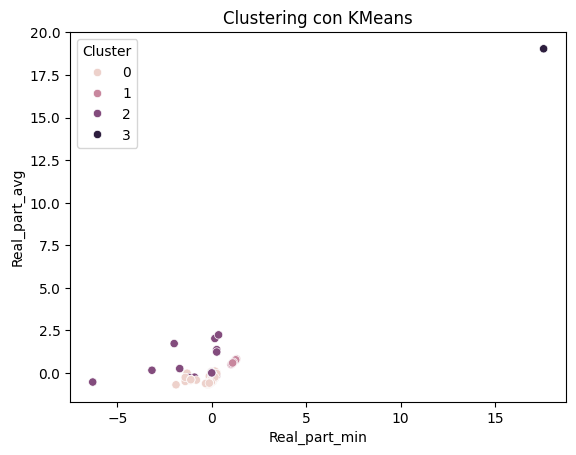

In [16]:
# Clustering (Aprendizaje No Supervisado)
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X)
exasens_data['Cluster'] = clusters
sns.scatterplot(x='Real_part_min', y='Real_part_avg', hue='Cluster', data=exasens_data)
plt.title("Clustering con KMeans")
plt.show()

**¿Qué se observa en el anterior scatter plot?** ¿No se ve muy bien no es así? Esto se debe a que estamos realizando el clustering con todas las variables presentes en X y KMeans funciona mejor con variables numéricas continuas que puedan representar distancias en un espacio vectorial. Sin embargo, "Smoking" es una variable categórica binaria (con valores como 0 o 1, o "Sí" o "No"), lo que significa que no tiene una escala continua ni una verdadera métrica de distancia. ¿Porqué?

1. **Variable Categórica Binaria:**
La distancia entre "Sí" y "No" es arbitraria y no tiene una interpretación clara en términos de distancia euclidiana, que es lo que KMeans utiliza para formar los clusters.
2. **Poca Variabilidad:**
Si la distribución de la variable "Smoking" está sesgada, por ejemplo, si la mayoría de los individuos son no fumadores, no aportará suficiente información para distinguir entre diferentes clusters. Esto podría llevar a un clustering sesgado o a resultados que no capturen bien las verdaderas relaciones en los datos.
3. **No Captura la Complejidad del Comportamiento de Fumadores:**
El simple hecho de ser fumador o no puede no capturar la complejidad de cómo el hábito de fumar afecta otros aspectos de la salud que podrían ser importantes para el clustering. Por ejemplo, la cantidad de cigarrillos al día, la duración del hábito de fumar, u otros factores relacionados podrían ser más informativos.

In [30]:
# Selección de las variables para PCA y KMeans


# Usaremos las variables 'Imagery_part_avg', 'Real_part_avg'
X_clustering = exasens_data[['Imagery_part_avg', 'Real_part_avg','Imagery_part_min', 'Real_part_min']]

# Aplicamos KMeans con 4 clusters para este ejemplo
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_clustering)

# Agregamos los clusters al dataset
exasens_data['Cluster'] = clusters

# Visualización del clustering
sns.scatterplot(x='Imagery_part_avg', y='Real_part_avg', hue='Cluster', palette='viridis', data=exasens_data)
plt.title("Clustering con KMeans - Variables: Imagery_part_avg, Real_part_avg, Age")
plt.xlabel('Imagery Part Avg')
plt.ylabel('Real Part Avg')
plt.show()

array([2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1,
       1, 2, 0, 0, 0, 0, 0, 2, 2, 1, 1, 0, 2, 1, 2, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0,
       2, 2, 0, 0, 0, 0, 0, 2, 3, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       2, 1, 2, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

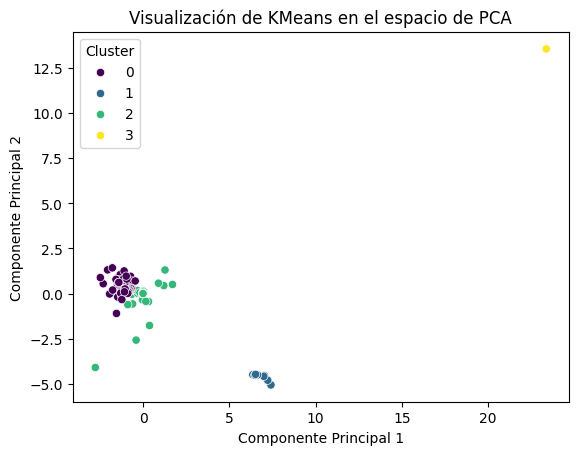

array([0.68967984, 0.27533337])

In [22]:
from sklearn.decomposition import PCA

# Realizar PCA para reducir la dimensionalidad a 2 componentes principales
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_clustering)

# Crear un DataFrame con los resultados de las componentes principales
pca_df = pd.DataFrame(data=X_pca, columns=['PCA1', 'PCA2'])

# Añadir los clusters del KMeans
pca_df['Cluster'] = exasens_data['Cluster']

# Visualización de los resultados del PCA
plt.figure()
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', palette='viridis',data=pca_df)
plt.title("Visualización de KMeans en el espacio de PCA")
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

# Explicación de la varianza capturada por cada componente
explained_variance = pca.explained_variance_ratio_
explained_variance


¿Qué habría pasado si hacíamos un PCA con todas las variables? Veamos el ejemplo

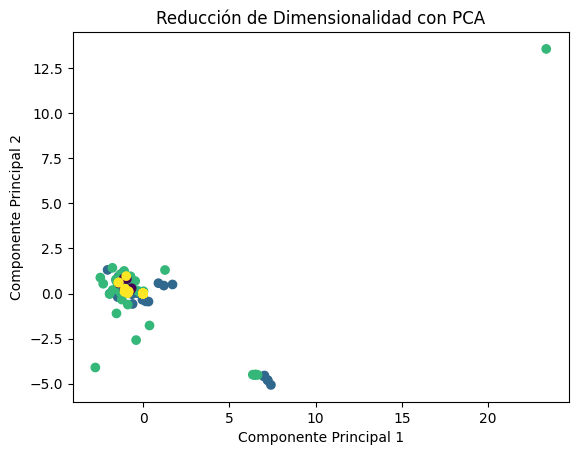

In [10]:
#Ejemplo menos eficiente, osea con todo el X
# Reducción de Dimensionalidad con PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.title("Reducción de Dimensionalidad con PCA")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.show()

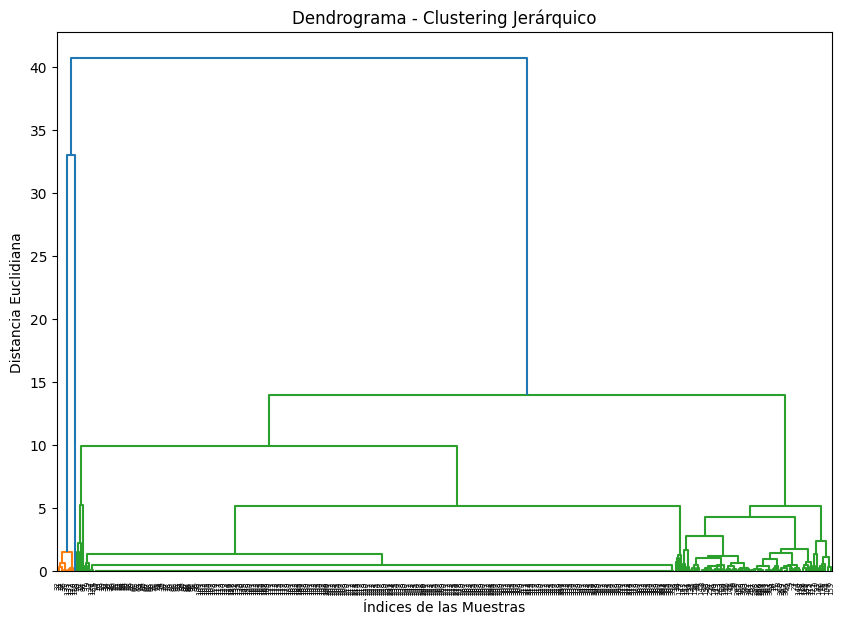

In [32]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Generar el linkage matrix
Z = linkage(X_clustering, method='ward')

# Crear el dendrograma
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Dendrograma')
plt.xlabel('Índice de Muestra')
plt.ylabel('Distancia')
plt.show()

# Generamos el dendrograma
plt.figure(figsize=(10, 7))
dendrogram(Z,
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)
plt.title("Dendrograma - Clustering Jerárquico")
plt.xlabel("Índices de las Muestras")
plt.ylabel("Distancia Euclidiana")
plt.show()


##Scoring
Los valores de Silhouette Score varían entre -1 y 1, donde:

- 1 indica que los puntos están bien agrupados y claramente separados de otros clusters.
- 0 sugiere que los puntos están en el límite entre dos clusters.
- 1 indica que los puntos están mal agrupados y podrían estar en el cluster incorrecto


In [26]:
from sklearn.metrics import silhouette_score
# Calcular Silhouette Score

silhouette_avg = silhouette_score(X_clustering, clusters)
print(f'Silhouette Score: {silhouette_avg}')


Silhouette Score: 0.8143675293879147


# Modelos Ensemble y Voting Classifier



In [ ]:
# Modelos Ensemble
voting_classifier = VotingClassifier(estimators=[
    ('lr', LogisticRegression()),
    ('rf', RandomForestClassifier()),
    ('gb', GradientBoostingClassifier())
], voting='soft')
voting_classifier.fit(X_train, y_train)
y_pred_ensemble = voting_classifier.predict(X_test)
print("\nVoting Classifier Report:")
print(classification_report(y_test, y_pred_ensemble))



Voting Classifier Report:
              precision    recall  f1-score   support

           0       0.31      0.19      0.24        21
           1       0.74      0.74      0.74        31
           2       0.45      0.67      0.54        43
           3       0.25      0.12      0.16        25

    accuracy                           0.49       120
   macro avg       0.44      0.43      0.42       120
weighted avg       0.46      0.49      0.46       120



In [ ]:

# Redes Neuronales Básicas
mlp = MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=1000)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)
print("\nRed Neuronal (MLP) Report:")
print(classification_report(y_test, y_pred_mlp))



Red Neuronal (MLP) Report:
              precision    recall  f1-score   support

           0       0.40      0.29      0.33        21
           1       0.75      0.77      0.76        31
           2       0.48      0.77      0.59        43
           3       0.25      0.04      0.07        25

    accuracy                           0.53       120
   macro avg       0.47      0.47      0.44       120
weighted avg       0.49      0.53      0.48       120



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
